# Analyse the impact of the data assimilation - Surface Model

In [20]:
# # Activate the following in colab : 
# !pip3 install netCDF4
# !apt install proj-bin libproj-dev libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip
# import python packages
import xarray as xr
from matplotlib import pyplot as plt


#### Fill in the dates and hours for the exercise

In [16]:
# year =  ''
# day  =  ''
# month = ''

# hour_1  =''
# hour_2  =''

year =  '2022'
day  =  '22'
month = '09'

hour_1  ='00'
hour_2  ='06'

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_lagged_12_h_subset_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)


url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_lagged_12_h_subset_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)

### Find a specific point and plot the forecast. 
###### Note AROME Arctic is on an irregular grid, so the xarray.sel functionality does not work:

In [17]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [18]:
[ix,jx] = findindex(forecast_1['latitude'],forecast_1['longitude'],78.24,15.46) # For example for Longyearbyen

#### For example temperature

In [24]:
t2m_point_forecast_1 = forecast_1['air_temperature_2m'].isel(height1=0, y=ix, x=jx)
t2m_point_forecast_2 = forecast_2['air_temperature_2m'].isel(height1=0, y=ix, x=jx)

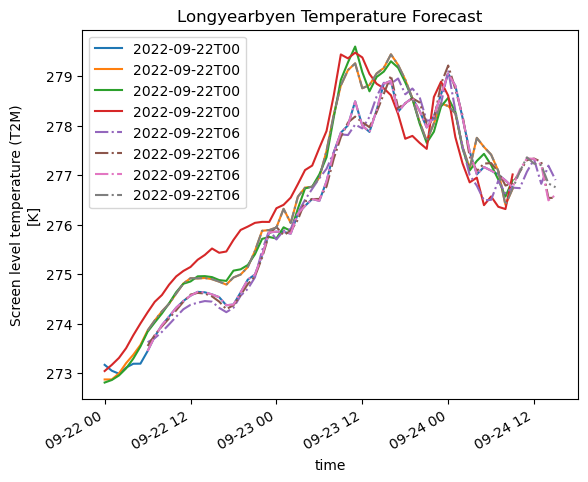

In [32]:
f, ax = plt.subplots()                              # define figure

t2m_point_forecast_1.plot.line(ax = ax, x='time', label=(np.datetime_as_string(t2m_point_forecast_1.time.isel(time=0), unit='h')), linestyle='-') 
t2m_point_forecast_2.plot.line(ax = ax, x='time', label=(np.datetime_as_string(t2m_point_forecast_2.time.isel(time=0), unit='h')), linestyle='-.')
plt.legend()
plt.title("Longyearbyen Temperature Forecast");

### Plot one forecast on a map

In [ ]:
from mpl_toolkits.basemap import Basemap

timestep_1=3


fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 60.0, urcrnrlat=82.0, llcrnrlon=-1.0, urcrnrlon=100.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( forecast_1.TS[timestep_1,:,:]-273.15),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')                  